In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [328]:
catalog = pd.read_csv('data/data_catalogue.csv')
data = pd.read_csv('data/data_arena_members.csv')

In [329]:
def plot_hist2d(x,
                y,
                title,
                xlabel,
                ylabel,
                ax,
                bins=(50,50),
                cmap=plt.cm.BuPu):
    ax.hist2d(x, y, bins=bins, cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def price_ditributions(catalog, price='creds'):
    if not price in ['creds', 'gold']:
        raise ValueError('Can display only creds and gold distibutions!')
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16,30))
    for i, ax in enumerate(axs.flat):
        ax.set_title(f'Level {i + 1}')
        sns.distplot(catalog[catalog['item_level']==i+1]['item_price_credit' if price=='creds' else 'item_price_gold'].values,
                     kde=i!=0 and i!=9, bins=15, ax=ax)
    plt.show()

# Working with "catalog"

In [236]:
catalog.head()

,item_cd,item_class,item_price_credit,item_price_gold,item_level,crew_size
0,1,mediumTank,356700,0,5,4
1,17,mediumTank,373000,0,5,5
2,33,heavyTank,0,1500,5,5
3,49,mediumTank,0,7500,8,4
4,81,mediumTank,0,0,1,5


In [330]:
# cleaning by crew_size: 2 <= crew_size <= 6
N = len(catalog)

catalog = catalog[(catalog['crew_size'] >= 2) & (catalog['crew_size'] <= 6)]

print(f'[CLEANING BY CREW_SIZE]: deleted {N - len(catalog)} rows.')

[CLEANING BY CREW_SIZE]: deleted 7 rows.


In [331]:
# cleaning by 1 level: item_price_credit = item_price_gold = 0
N = len(catalog)

catalog = catalog[(catalog['item_level'] != 1) |
                  ((catalog['item_price_credit'] == 0) & (catalog['item_price_gold'] == 0))]

print(f'[CLEANING BY 1 LVL]: deleted {N - len(catalog)} rows.')

[CLEANING BY 1 LVL]: deleted 9 rows.


In [332]:
# cleaning by price: item_price_credit > 100 or item_price_gold > 100
N = len(catalog)

catalog = catalog[(catalog['item_level'] == 1) |
                  (((catalog['item_price_credit'] > 100) & (catalog['item_price_gold'] == 0)) |
                  ((catalog['item_price_credit'] == 0) & (catalog['item_price_gold'] > 100)))]

print(f'[CLEANING BY PRICE]: deleted {N - len(catalog)} rows.')

[CLEANING BY PRICE]: deleted 98 rows.


In [333]:
# custom cleaning by price 2 level: 2000 < item_price_credit < 20000
N = len(catalog)

catalog = catalog[(catalog['item_level'] != 2) | (catalog['item_price_gold'] != 0) |
                   (catalog['item_price_credit'] > 2000) & (catalog['item_price_credit'] < 20000)]

print(f'[CUSTOM CLEANING BY PRICE 2 LVL]: deleted {N - len(catalog)} rows.')

[CUSTOM CLEANING BY PRICE 2 LVL]: deleted 20 rows.


In [334]:
# custom cleaning by price 5 level: item_price_credit < 500000
N = len(catalog)

catalog = catalog[(catalog['item_level'] != 5) |
                  (catalog['item_price_gold'] != 0) | (catalog['item_price_credit'] < 500000)]

print(f'[CUSTOM CLEANING BY PRICE 5 LVL]: deleted {N - len(catalog)} rows.')

[CUSTOM CLEANING BY PRICE 5 LVL]: deleted 1 rows.


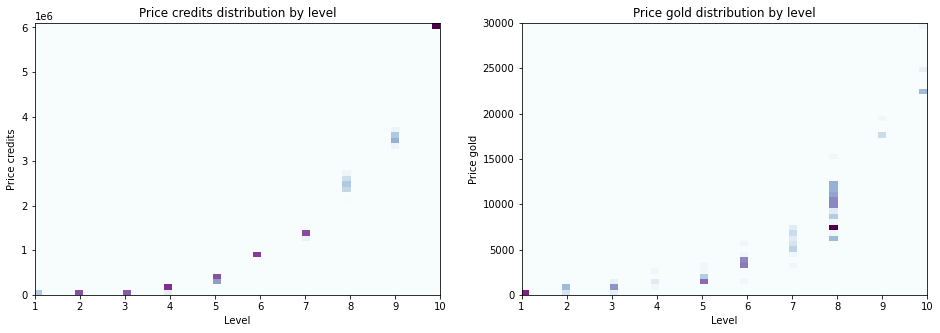

In [335]:
creds_catalog = catalog[catalog['item_price_gold'] == 0]
gold_catalog = catalog[catalog['item_price_credit'] == 0]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

plot_hist2d(x=creds_catalog['item_level'],
            y=creds_catalog['item_price_credit'],
            title='Price credits distribution by level',
            xlabel='Level',
            ylabel='Price credits',
            ax=axs[0])

plot_hist2d(x=gold_catalog['item_level'],
            y=gold_catalog['item_price_gold'],
            title='Price gold distribution by level',
            xlabel='Level',
            ylabel='Price gold',
            ax=axs[1])

plt.show()

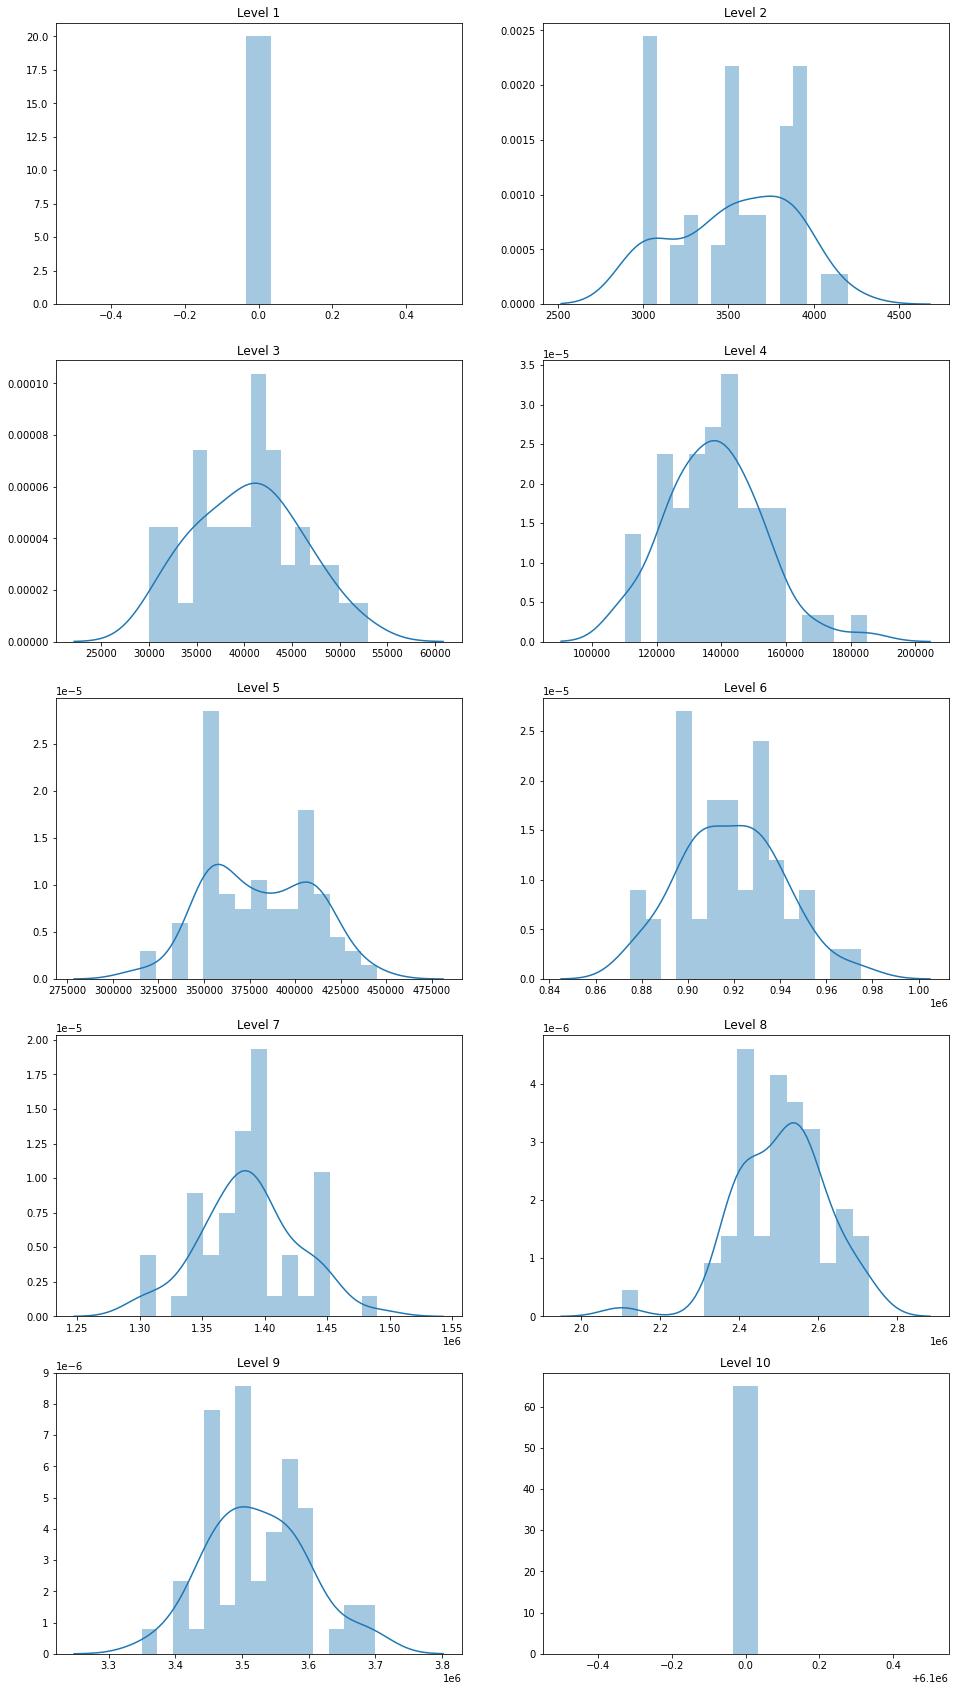

In [337]:
price_ditributions(creds_catalog, price='creds')

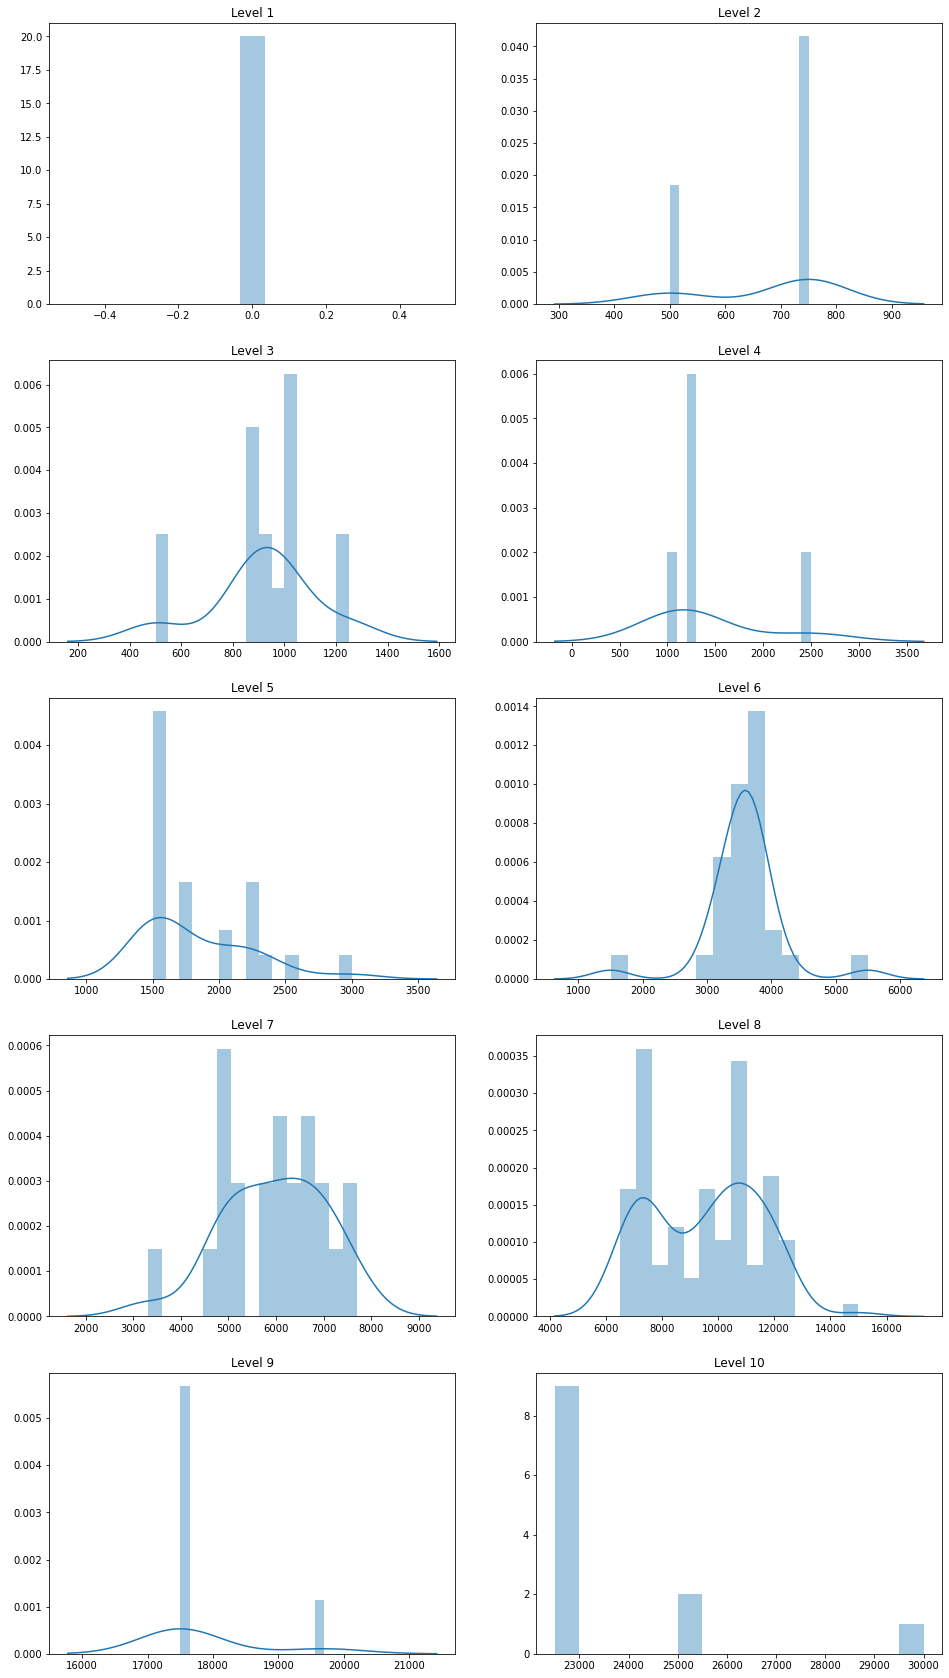

In [336]:
price_ditributions(gold_catalog, price='gold')

In [340]:
catalog.shape

(753, 6)

In [342]:
catalog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 887
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   item_cd            753 non-null    int64 
 1   item_class         753 non-null    object
 2   item_price_credit  753 non-null    int64 
 3   item_price_gold    753 non-null    int64 
 4   item_level         753 non-null    int64 
 5   crew_size          753 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 41.2+ KB


In [343]:
catalog.describe()

,item_cd,item_price_credit,item_price_gold,item_level,crew_size
count,753.000000,7.530000e+02,753.000000,753.000000,753.000000
mean,23770.243028,1.168060e+06,2238.698539,6.175299,4.290837
std,22300.034277,1.844741e+06,4594.101058,2.525103,0.964328
min,1.000000,0.000000e+00,0.000000,1.000000,2.000000
25%,4993.000000,0.000000e+00,0.000000,4.000000,4.000000
50%,14625.000000,1.400000e+05,0.000000,6.000000,4.000000
75%,49937.000000,1.400000e+06,1500.000000,8.000000,5.000000
max,65345.000000,6.100000e+06,30000.000000,10.000000,6.000000


In [344]:
# --> no duplicates
catalog.duplicated().sum()

0

In [345]:
# --> no missing values
catalog.isnull().sum()

item_cd              0
item_class           0
item_price_credit    0
item_price_gold      0
item_level           0
crew_size            0
dtype: int64

## Have a closer look at some features

In [346]:
for feature in ['item_class']:
    catalog[feature] = pd.Categorical(catalog[feature])

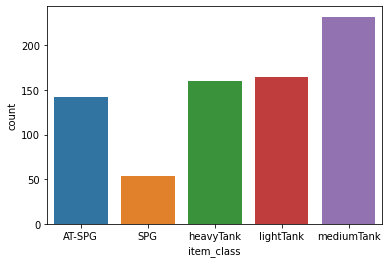

In [347]:
sns.countplot(catalog['item_class']);

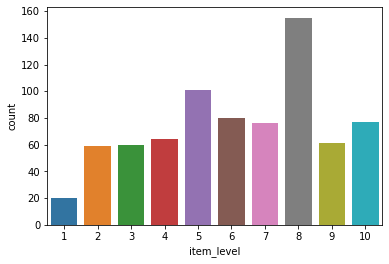

In [348]:
sns.countplot(catalog['item_level']);

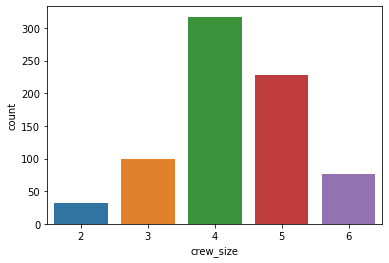

In [349]:
sns.countplot(catalog['crew_size']);

# Working with "data" dataset

In [24]:
data.head()

,dt,arena_id,account_db_id,team_id,clan_db_id,prebattle_id,is_prebattle_creator,vehicle_type_cd,life_time_sec,shots,...,mileage_meter,remained_hp,original_credits,original_xp,premium_xp_factor,daily_xp_factor,battle_num,damage_blocked_by_armor,booster_bonus_credits,booster_bonus_xp
0,2018-10-27,4yNy14y4yN12d42dT,c42c4aydT,2,0,0,0,2849,132,3,...,459,-3,27279,1084,15,20,11956,0,0,0
1,2018-10-27,4yNy14y4yN12d42dT,c2TaaayN4,1,500033550,0,0,63553,195,6,...,708,0,6282,68,15,10,9832,0,0,0
2,2018-10-27,4yNy14y4yN12d42dT,cyyd47dc4,2,500051107,67896661,0,17665,224,11,...,656,0,36102,3560,15,20,39190,0,0,1130
3,2018-10-27,4yNy14y4yN12d42dT,c2cdc441y,2,0,0,0,11537,381,8,...,1912,387,16317,1678,15,20,7217,0,0,0
4,2018-10-27,4yNy14y4yN12d42dT,cdT7cTT21,1,0,0,0,7937,198,5,...,507,0,11620,232,15,10,9532,0,0,0


## Check if there are any duplicates

In [25]:
# --> no duplicates
data.duplicated().sum()

0

## Check if there are any missing values

In [26]:
#  --> no null values
data.isnull().sum()

dt                          0
arena_id                    0
account_db_id               0
team_id                     0
clan_db_id                  0
prebattle_id                0
is_prebattle_creator        0
vehicle_type_cd             0
life_time_sec               0
shots                       0
hits                        0
he_hits                     0
pierced                     0
damage_dealt                0
damage_assisted_radio       0
damage_assisted_stun        0
damage_assisted_track       0
damage_received             0
shots_received              0
no_damage_shots_received    0
pierced_received            0
spotted                     0
damaged                     0
kills_made                  0
mileage_meter               0
remained_hp                 0
original_credits            0
original_xp                 0
premium_xp_factor           0
daily_xp_factor             0
battle_num                  0
damage_blocked_by_armor     0
booster_bonus_credits       0
booster_bo

In [27]:
data.describe()

,team_id,clan_db_id,prebattle_id,is_prebattle_creator,vehicle_type_cd,life_time_sec,shots,hits,he_hits,pierced,...,mileage_meter,remained_hp,original_credits,original_xp,premium_xp_factor,daily_xp_factor,battle_num,damage_blocked_by_armor,booster_bonus_credits,booster_bonus_xp
count,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,...,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06
mean,1.500012e+00,2.843463e+08,7.294238e+06,7.078356e-02,2.385905e+04,2.976262e+02,7.737261e+00,5.338601e+00,3.319876e-01,3.642870e+00,...,1.172209e+03,1.898441e+02,3.101604e+04,1.051142e+03,1.499911e+01,1.359025e+01,2.330818e+04,4.413510e+02,2.001733e+03,1.087805e+02
std,5.000002e-01,2.476774e+08,2.682621e+07,2.564630e-01,2.240161e+04,1.348282e+02,5.083631e+00,4.033531e+00,1.314018e+00,3.004760e+00,...,7.146287e+02,3.944958e+02,2.388009e+04,1.048554e+03,1.153523e-01,7.431458e+00,1.681642e+04,7.220232e+02,7.045504e+03,2.797012e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-1.300000e+01,-1.037000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.501000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.377000e+03,2.010000e+02,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,...,6.920000e+02,0.000000e+00,1.472100e+04,3.300000e+02,1.500000e+01,1.000000e+01,1.052400e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,5.000197e+08,0.000000e+00,0.000000e+00,1.334500e+04,2.870000e+02,7.000000e+00,5.000000e+00,0.000000e+00,3.000000e+00,...,1.027000e+03,0.000000e+00,2.421500e+04,6.900000e+02,1.500000e+01,1.000000e+01,1.931600e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,5.000720e+08,0.000000e+00,0.000000e+00,5.019300e+04,3.740000e+02,1.000000e+01,7.000000e+00,0.000000e+00,5.000000e+00,...,1.507000e+03,1.180000e+02,3.972500e+04,1.418000e+03,1.500000e+01,2.000000e+01,3.192900e+04,6.400000e+02,0.000000e+00,0.000000e+00
max,2.000000e+00,5.001649e+08,2.687535e+08,1.000000e+00,6.528100e+04,9.000000e+02,6.300000e+01,5.100000e+01,2.700000e+01,4.000000e+01,...,1.491800e+04,3.000000e+03,3.055860e+05,1.341000e+04,1.500000e+01,4.000000e+01,2.210440e+05,1.665000e+04,1.577200e+05,3.274000e+03


## Have a closer look at some features

In [28]:
for feature in ['arena_id', 'account_db_id', 'team_id', 'clan_db_id', 
               'prebattle_id', 'is_prebattle_creator', 'vehicle_type_cd']:
    data[feature] = pd.Categorical(data[feature])
    
data['dt'] = pd.to_datetime(data['dt'])

### dt

All battles took place in October 2018 (between October 1 and October 31)

In [29]:
data['dt'].describe()

count                 1403405
unique                     31
top       2018-10-10 00:00:00
freq                    90952
first     2018-10-01 00:00:00
last      2018-10-31 00:00:00
Name: dt, dtype: object

### arena_id

47.363 unique battles were held.

There were 30 players in most battles (30 -> 20 -> 14). 
However, in some battles, a number of players was either odd (19, 13) or 
strangely small (2, 4). Are those battles connected to special events?

In [30]:
battles = data['arena_id'].value_counts()
battles

yyyyd1d41y77yN4      30
4T4yy272yyydTa2da    30
4T4yy2241TT42c1ya    30
4T4yy21d7ddN127Tc    30
4T4yy21N2NdNyN7dd    30
                     ..
71a1daddT4yN4c7       5
424y1a22T2d7T11a7     4
Ty72acc1444a4d1       3
Ty7cc77dTNNd7N4       3
4d2721ay1a7c11Nya     2
Name: arena_id, Length: 47363, dtype: int64

In [31]:
battles.to_frame()['arena_id'].value_counts()

30    45883
20     1032
14      417
19        8
13        5
12        4
22        2
18        2
3         2
21        1
17        1
24        1
7         1
6         1
5         1
4         1
2         1
Name: arena_id, dtype: int64

### account_db_id

367.746 unique players took part in battles.

In [32]:
data['account_db_id'].value_counts()

c2aTcT4y4    214
cdNcaNN77    201
c277NNN2y    140
cadaaNc77    121
c4NacTcc4     98
            ... 
caadc1121      1
cdccTT142      1
caadc1ccN      1
caadc27dd      1
c2111224a      1
Name: account_db_id, Length: 367746, dtype: int64

### team_id

Either 1 or 2

In [33]:
data['team_id'].value_counts()

2    701719
1    701686
Name: team_id, dtype: int64

### prebattle_id, is_prebattle_creator

~83% of players were not a part of any platoon

In [34]:
data[data['prebattle_id'] == 0].shape[0] / data.shape[0]

0.8267542156398189

In [35]:
data['is_prebattle_creator'].value_counts()

0    1304067
1      99338
Name: is_prebattle_creator, dtype: int64

### vehicle_type_cd

All tanks used in the battles are real (there is a corresponding entry in "catalog")

In [36]:
data['vehicle_type_cd'].describe()

count     1403405
unique        351
top         50193
freq        77041
Name: vehicle_type_cd, dtype: int64

In [37]:
data['vehicle_type_cd'].unique().isin(catalog['item_cd']).sum()

351

### Different battle characteristics

Need to be normalized to lifetime in a battle / mileage meter

In [38]:
target_params = ['shots', 'hits', 'he_hits', 'pierced']
damage_params = ['damage_dealt', 'damage_assisted_track', 'damage_assisted_radio', 
               'damage_assisted_stun']
income_params = ['damage_received', 'shots_received', 'no_damage_shots_received',
                'pierced_received']

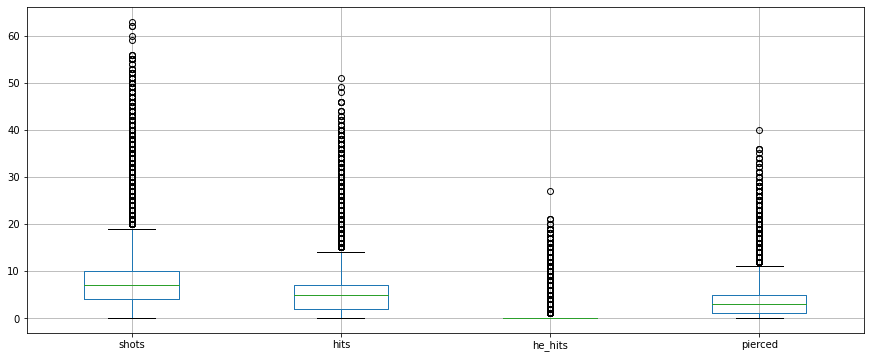

In [39]:
data[target_params].boxplot(figsize=(15, 6));

In [40]:
data[target_params].corr()

,shots,hits,he_hits,pierced
shots,1.000000,0.889610,0.042683,0.793251
hits,0.889610,1.000000,-0.164124,0.882728
he_hits,0.042683,-0.164124,1.000000,-0.090778
pierced,0.793251,0.882728,-0.090778,1.000000


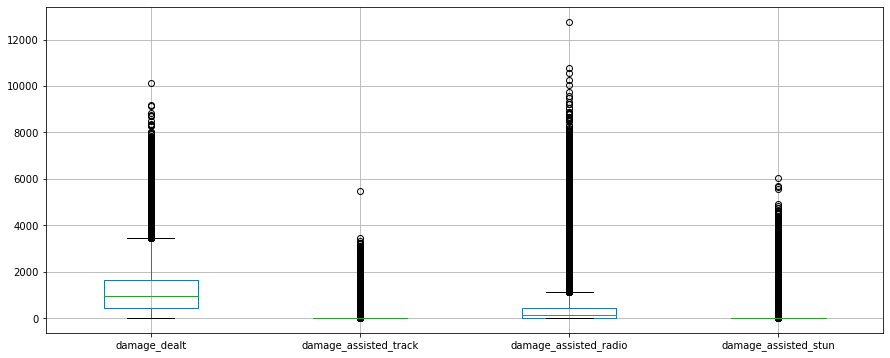

In [41]:
data[damage_params].boxplot(figsize=(15, 6));

In [42]:
data[damage_params].corr()

,damage_dealt,damage_assisted_track,damage_assisted_radio,damage_assisted_stun
damage_dealt,1.000000,0.163000,0.083237,0.052318
damage_assisted_track,0.163000,1.000000,0.032366,-0.020924
damage_assisted_radio,0.083237,0.032366,1.000000,-0.112695
damage_assisted_stun,0.052318,-0.020924,-0.112695,1.000000


In [43]:
data[income_params].describe()

,damage_received,shots_received,no_damage_shots_received,pierced_received
count,1.403405e+06,1.403405e+06,1.403405e+06,1.403405e+06
mean,1.162685e+03,5.298493e+00,1.668618e+00,3.629874e+00
std,5.269663e+02,3.593657e+00,2.452909e+00,1.881227e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+02,3.000000e+00,0.000000e+00,2.000000e+00
50%,1.300000e+03,5.000000e+00,1.000000e+00,4.000000e+00
75%,1.500000e+03,7.000000e+00,2.000000e+00,5.000000e+00
max,3.000000e+03,6.700000e+01,6.200000e+01,2.000000e+01


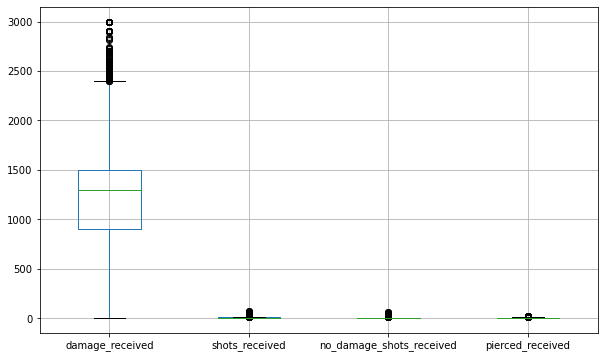

In [44]:
data[income_params].boxplot(figsize=(10, 6));

### life_time_sec

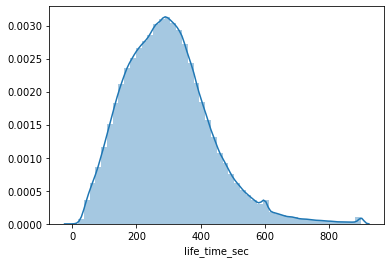

In [45]:
sns.distplot(data['life_time_sec']);

## Create new features (normalized to time/etc) 

In [46]:
def normalize_feature(target_feature, norm_feature):
    if norm_feature != 0:
        return target_feature / norm_feature
    else:
        return 0
    
normalize_feature = np.vectorize(normalize_feature)

### Normalize to time

In [47]:
target_features = ['shots', 'hits', 'he_hits', 'pierced', 'damage_dealt', 
                   'damage_assisted_track', 'damage_assisted_radio', 
                   'damage_assisted_stun', 'damage_received', 'shots_received', 
                   'no_damage_shots_received', 'pierced_received', 'spotted', 
                   'damaged', 'kills_made', 'mileage_meter']
# target_features = ['shots']

for feature in target_features:
    new_feature = feature + '_per_sec'
    data[new_feature] = normalize_feature(data[feature], data['life_time_sec'])

### Compare distributions before and after normalization

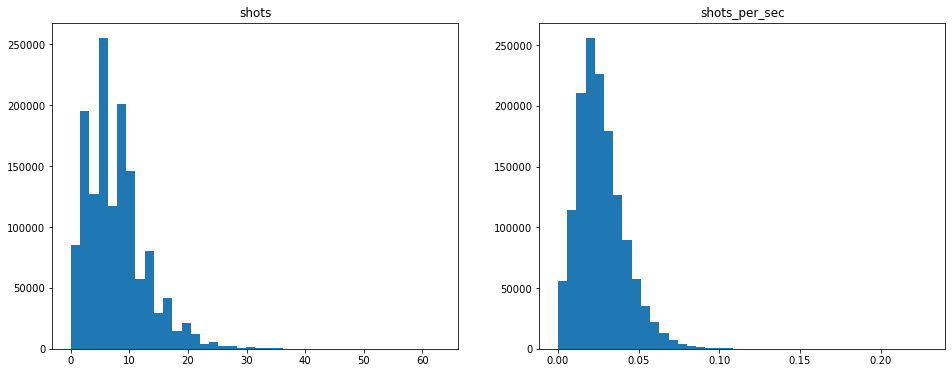

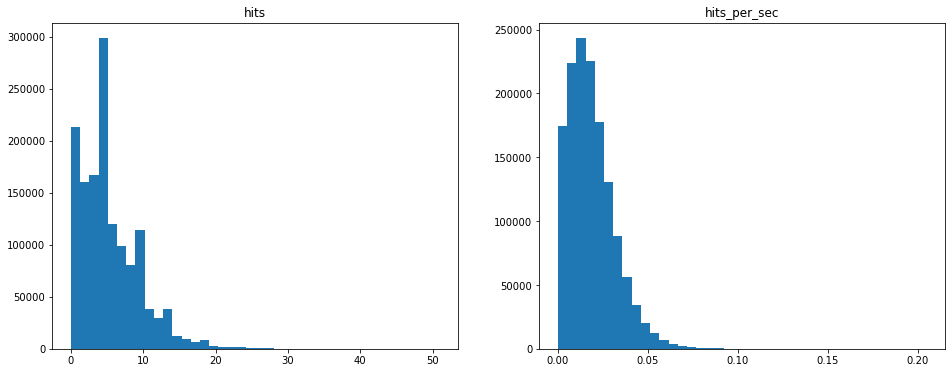

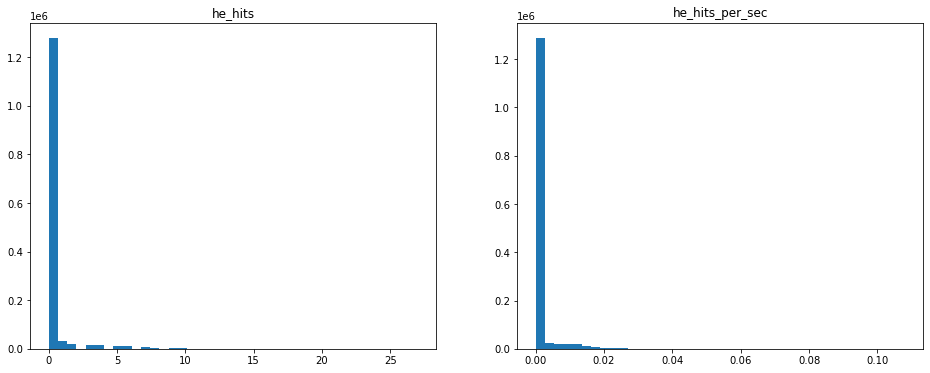

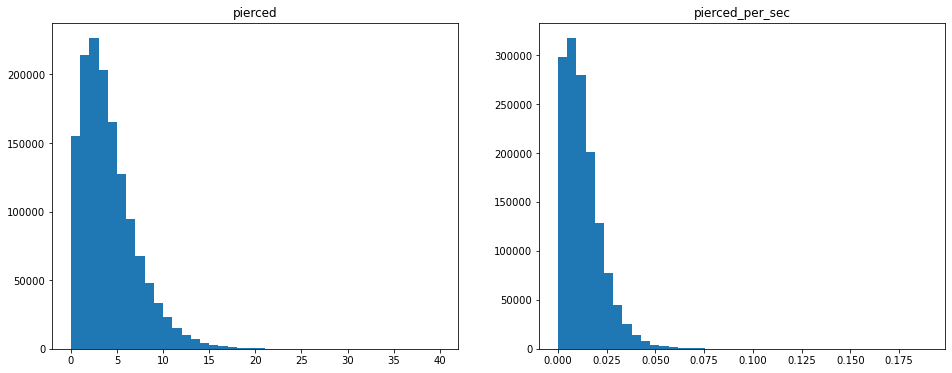

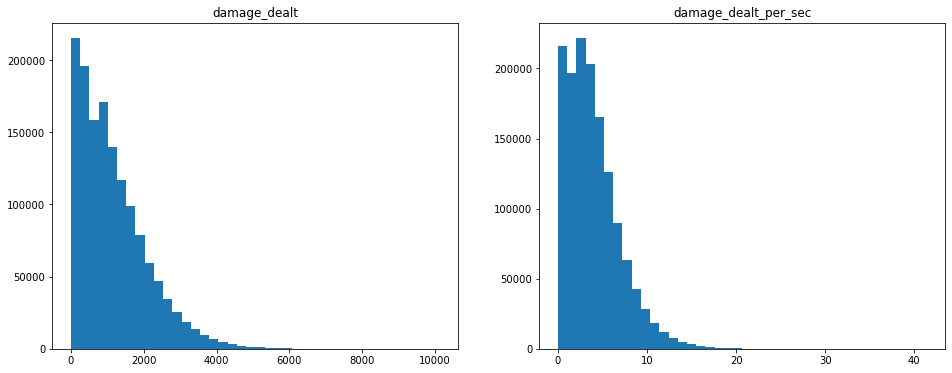

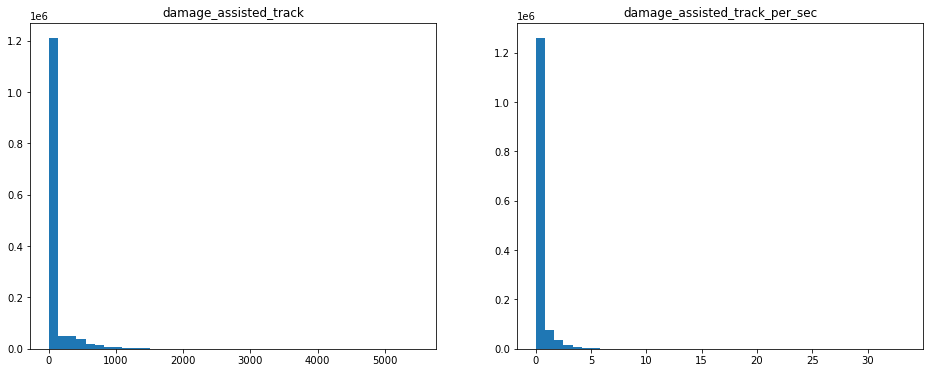

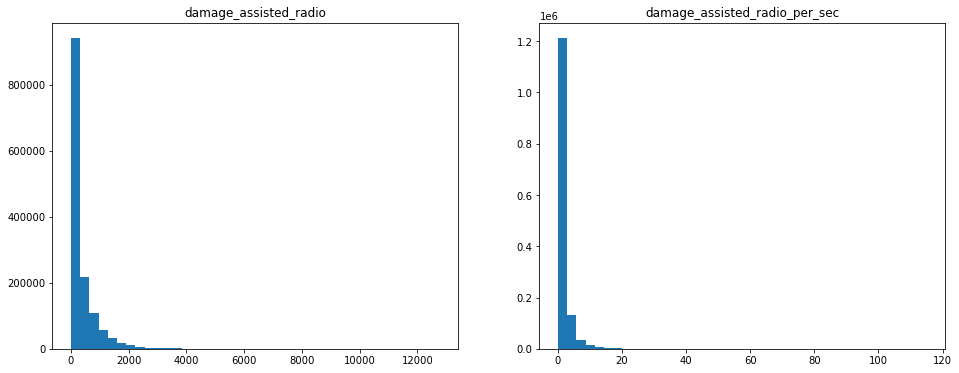

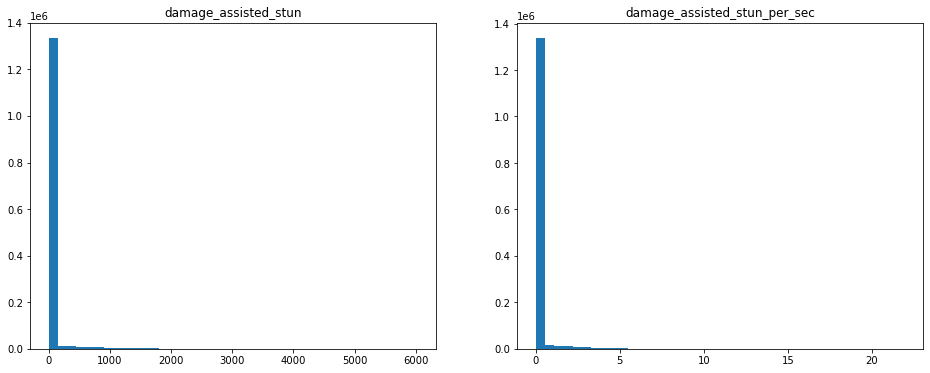

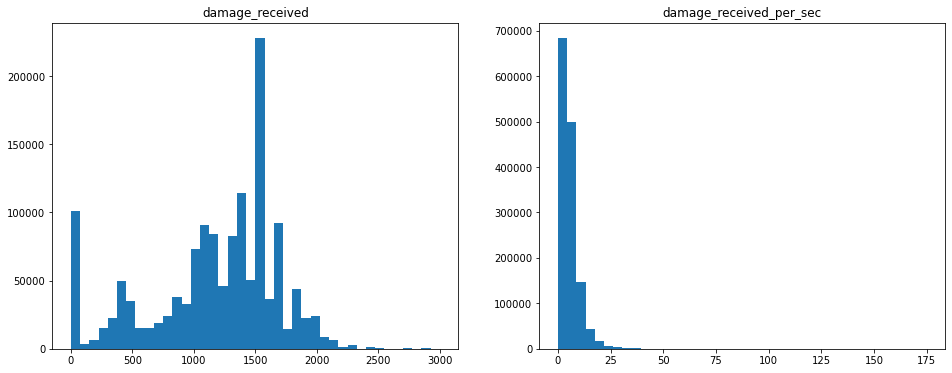

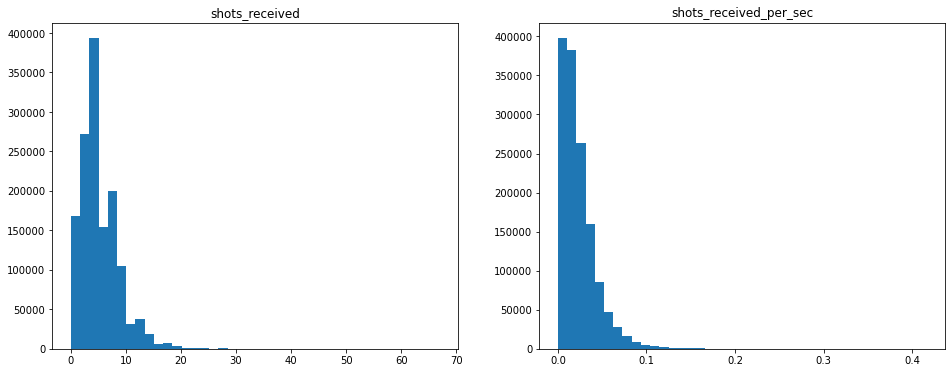

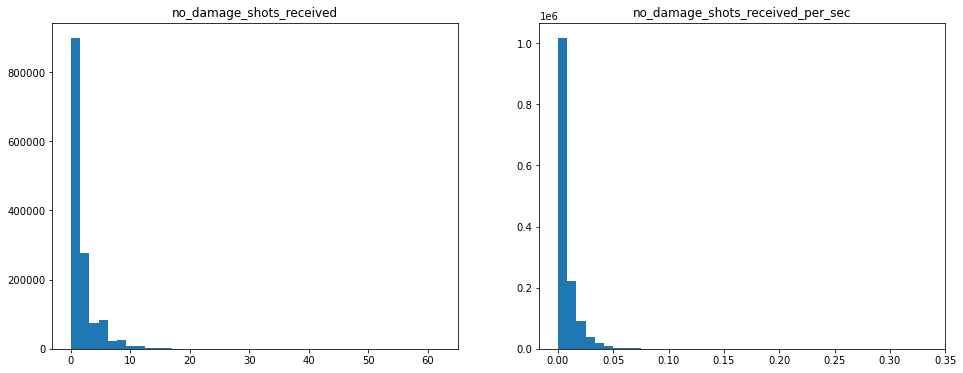

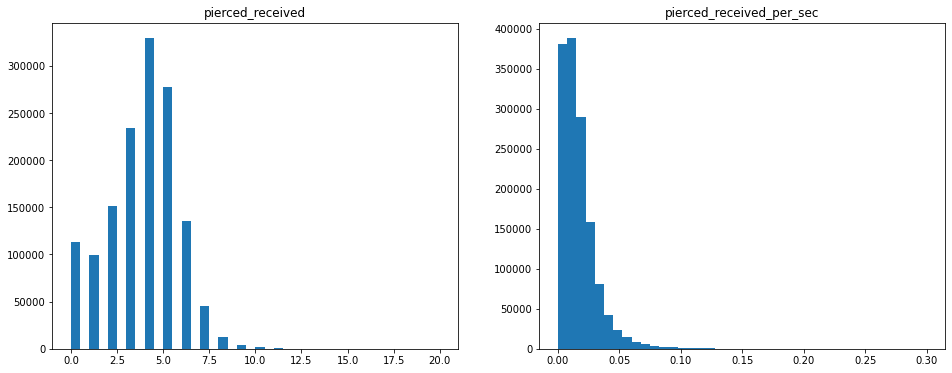

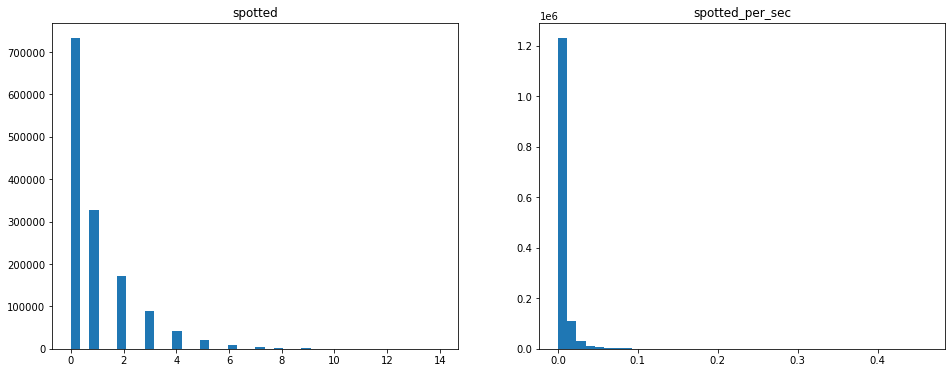

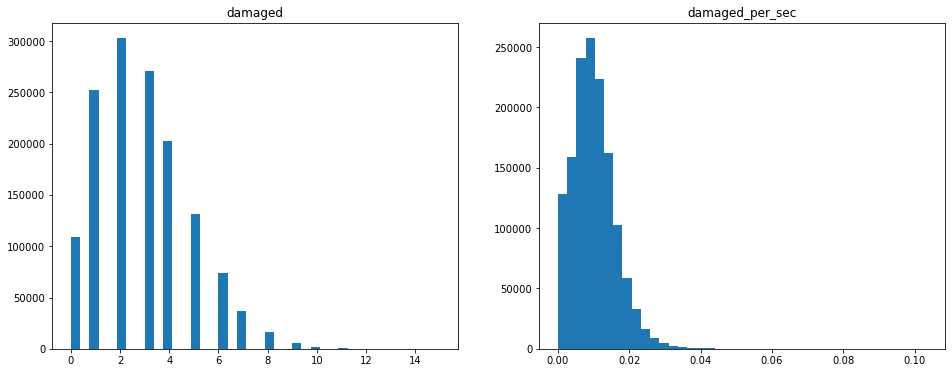

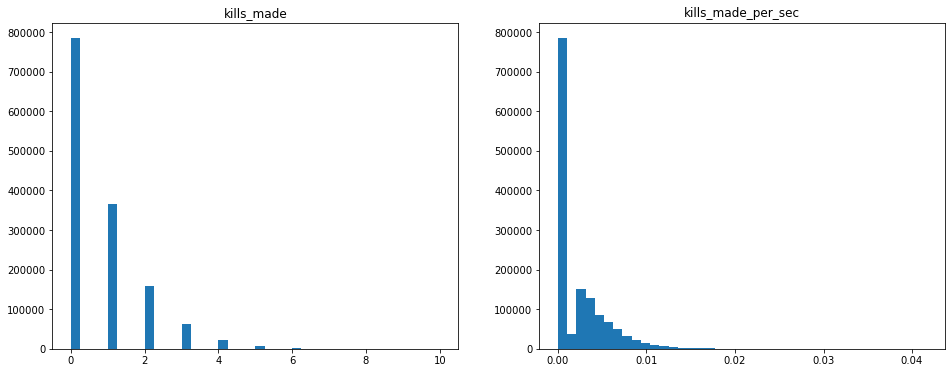

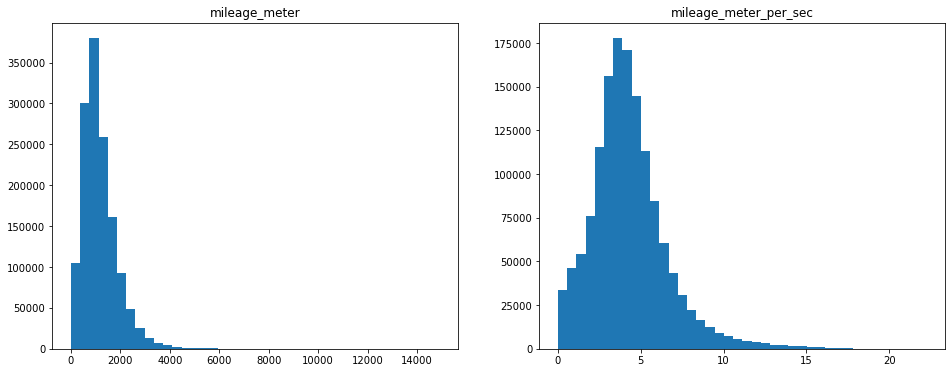

In [48]:
for feature in target_features:
    new_feature = feature + '_per_sec'

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].hist(data[feature], bins=40)
    axes[1].hist(data[new_feature], bins=40)
    
    axes[0].set_title(feature)
    axes[1].set_title(new_feature)